# Basic Steps to be followed
1. Importing Required Libraries
2. Load the Data
3. Preprocess the data
4. Define the Model
5. Compile the model
6. Fit the model
7. Evaluate

# 1. Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten

In [2]:
# Checking the versions of tensorflow and keras
print(tf.__version__)
print(keras.__version__)

2.12.0
2.12.0


# 2. Loading The MNIST Dataset

In [3]:
from keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

### Observation:
- Train data has 60000 images of 28x28 dimension
- Test data has 10000 images of 28x28 dimension
- The images are in black and white

In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

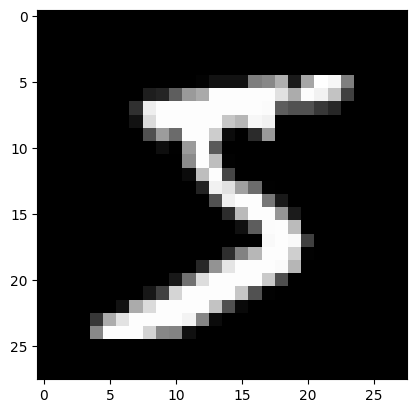

In [8]:
plt.imshow(x_train[0],cmap="gray")

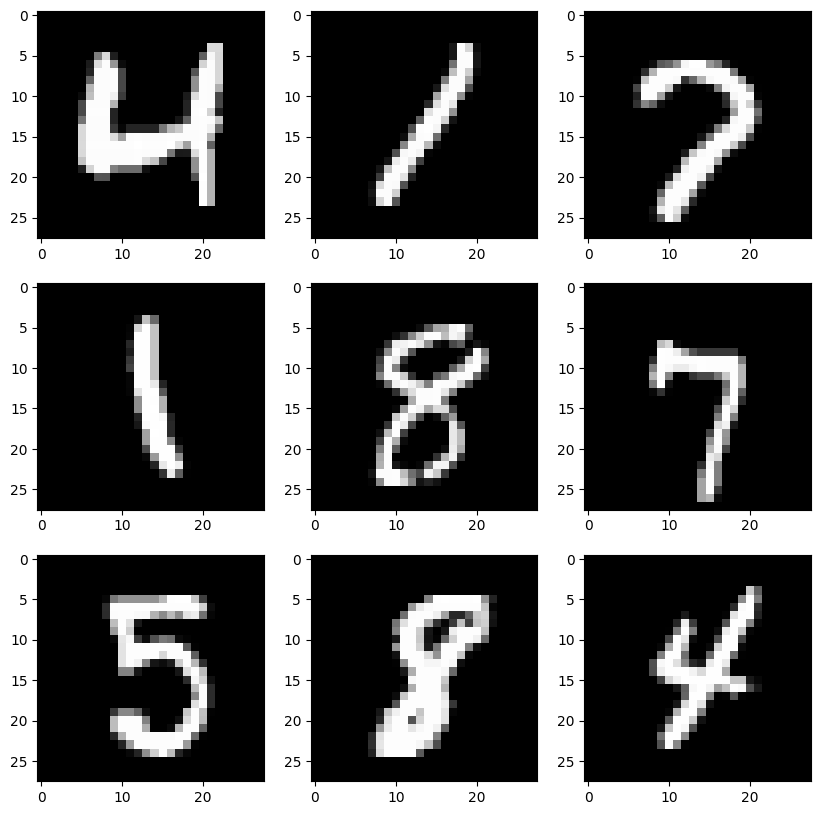

In [9]:
# Viewing few random images from the data
plt.figure(figsize=(10,10))
np.random.seed(0)
index = np.random.randint(0,60000,9)
for i in range(len(index)):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[index[i]],cmap="gray")

# 3. Data Preprocessing

In [10]:
# Min Max Scaling without using the library
# x - x_min/ x_max - x_min
# x_min = 0 (The smallest Pixel value)
# x_max = 255 (The maximum pixel value)

x_train_scaled = x_train/255      #x_train - 0 / 255 - 0
x_test_scaled = x_test/255

In [11]:
# Converting 2d to 1d using numpy reshape
# 60000 data points will remain the same
# The next dimension will be 28x28 = 784
x_train_flattened = x_train_scaled.reshape(60000,784)

In [12]:
# Similarly for test data
x_test_flattened = x_test_scaled.reshape(10000,784)

In [13]:
# Checking the datatype of scaled df
x_train_scaled.dtype

dtype('float64')

In [14]:
x_train_flattened.shape

(60000, 784)

In [15]:
# Converting the output to One Hot Encoding using np_utils from keras
y_train_encoded = np_utils.to_categorical(y_train,10)
y_test_encoded = np_utils.to_categorical(y_test,10)
# 10 Because in our dataset there are 10 classes(0 to 9)

In [16]:
print(y_train[0])
print(y_train_encoded[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# 4. Define the model - Softmax Classifier

In [17]:
model = Sequential()
# Sequential: Simple feedforward Network Where the neurons of the layers are connected
model.add(Dense(10,input_dim=784,activation="softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


# 5. Compile the model

In [19]:
model.compile(optimizer="sgd",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# 6. Fit the model

In [20]:
model.fit(x_train_flattened,y_train_encoded,batch_size=128,epochs=10)

Epoch 1/10
469/469 [==============================] - 5s 7ms/step - loss: 1.3031 - accuracy: 0.6993
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.7209 - accuracy: 0.8406
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5890 - accuracy: 0.8597
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.5262 - accuracy: 0.8694
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4881 - accuracy: 0.8758
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.4619 - accuracy: 0.8801
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4426 - accuracy: 0.8834
Epoch 8/10
469/469 [==============================] - 3s 5ms/step - loss: 0.4276 - accuracy: 0.8866
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4155 - accuracy: 0.8887
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4054 - accuracy: 0.8912

# 7. Evaluate the model

In [21]:
model.evaluate(x_test_flattened,y_test_encoded)

313/313 [==============================] - 1s 2ms/step - loss: 0.3804 - accuracy: 0.8986


[0.3803711533546448, 0.8985999822616577]

In [22]:
model.evaluate(x_test_flattened,y_test_encoded,verbose=0)

[0.3803711533546448, 0.8985999822616577]

# 4. Define The Model - Sigmoid Activation

In [23]:
model = Sequential()
model.add(Dense(512,input_dim=784,
                activation="sigmoid"))# First Input Layer + First Hidden Layer
model.add(Dense(128,activation="sigmoid")) # Second Layer
model.add(Dense(64,activation="sigmoid")) # Third Layer
model.add(Dense(10,activation="softmax")) # Output Layer

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 476,490
Trainable params: 476,490
Non-trainable params: 0
_________________________________________________________________


# 5. Compile The Model

In [25]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

# 6. Fit the Model

In [26]:
model.fit(x_train_flattened,y_train_encoded,batch_size=128,epochs=10)

Epoch 1/10
469/469 [==============================] - 8s 14ms/step - loss: 0.7092 - accuracy: 0.8201
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.2248 - accuracy: 0.9363
Epoch 3/10
469/469 [==============================] - 6s 14ms/step - loss: 0.1515 - accuracy: 0.9564
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1114 - accuracy: 0.9681
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0874 - accuracy: 0.9743
Epoch 6/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0689 - accuracy: 0.9795
Epoch 7/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0551 - accuracy: 0.9842
Epoch 8/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0434 - accuracy: 0.9877
Epoch 9/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0369 - accuracy: 0.9894
Epoch 10/10
469/469 [==============================] - 9s 18ms/step - loss: 0.0296 - accura

# 7. Evaluate The Model

In [27]:
model.evaluate(x_test_flattened,y_test_encoded)

313/313 [==============================] - 1s 4ms/step - loss: 0.0685 - accuracy: 0.9794


[0.06854818016290665, 0.9793999791145325]

# 4. Define The Model - ReLU Activation

In [28]:
model = Sequential()
model.add(Dense(512,input_dim=784,
                activation="relu"))# First Input Layer + First Hidden Layer
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128,activation="relu")) # Second Layer
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64,activation="relu")) # Third Layer
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(10,activation="softmax")) # Output Layer

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)              

# 5. Compile the Model

In [30]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

# 6. Fit the Model

In [31]:
model.fit(x_train_flattened,y_train_encoded,batch_size=128,epochs=10)

Epoch 1/10
469/469 [==============================] - 11s 18ms/step - loss: 0.3871 - accuracy: 0.8861
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1714 - accuracy: 0.9501
Epoch 3/10
469/469 [==============================] - 10s 20ms/step - loss: 0.1299 - accuracy: 0.9612
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1089 - accuracy: 0.9671
Epoch 5/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0936 - accuracy: 0.9724
Epoch 6/10
469/469 [==============================] - 9s 18ms/step - loss: 0.0854 - accuracy: 0.9741
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0752 - accuracy: 0.9769
Epoch 8/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0715 - accuracy: 0.9786
Epoch 9/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0634 - accuracy: 0.9809
Epoch 10/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0578 - acc

# 7. Evaluate The Model

In [32]:
model.evaluate(x_test_flattened,y_test_encoded)

313/313 [==============================] - 2s 4ms/step - loss: 0.0641 - accuracy: 0.9812


[0.06406933069229126, 0.9811999797821045]